w:9.615956988816722, b:0.20658547158429796
loss is 7.564579437557071
w:9.520281887087728, b:0.28202209000485134
loss is 2.5271564506336426
w:9.519219905104608, b:0.35998216379606124
loss is 2.405854102489826
w:9.523531109810142, b:0.4347694340745135
loss is 2.29753111589542
w:9.50881782243378, b:0.5080801216864843
loss is 2.240219265209579
w:9.509551633678525, b:0.5801617013230911
loss is 2.114996980910523
w:9.524960808303149, b:0.6514332481404798
loss is 2.033608252733776
w:9.523469604495864, b:0.718682510367359
loss is 1.9415000843846784
w:9.520189887943094, b:0.7852091713061915
loss is 1.8351449848260057
w:9.51329372192846, b:0.8509164820114341
loss is 1.7211375635756851
w:9.507278051870163, b:0.913888259595694
loss is 1.645821657286437
w:9.513165543241175, b:0.9744830060302105
loss is 1.5766307627504048
w:9.511988233744212, b:1.032892807373337
loss is 1.5071415480427877
w:9.502832649395094, b:1.0917793971297478
loss is 1.4370152566159045
w:9.510859201580303, b:1.1480632271678182
lo

w:9.463462397667831, b:3.2298880873412297
loss is 0.12349914880366511
w:9.462235523207715, b:3.233476465752201
loss is 0.1231015220683289
w:9.462956837719108, b:3.2369733207470857
loss is 0.12277724014120778
w:9.461733352862497, b:3.2400448626959233
loss is 0.1229271635574032
w:9.459526383833678, b:3.2433471447382356
loss is 0.12755340973684087
w:9.461380740072533, b:3.246962391982111
loss is 0.12270119270694999
w:9.464548528019062, b:3.2502905835080633
loss is 0.12464385825255755
w:9.461838747316483, b:3.2533944424194
loss is 0.12176084924692235
w:9.463843410912194, b:3.2561220915776152
loss is 0.12297240072298891
w:9.459306247996476, b:3.2592025698026488
loss is 0.12618930696517763
w:9.461731276330644, b:3.26178279508649
loss is 0.12122546070780854
w:9.464861151464264, b:3.265125111081301
loss is 0.12557498686475665
w:9.459767981045381, b:3.267601641949514
loss is 0.12378719248103724
w:9.461890208980913, b:3.2703197005063953
loss is 0.12065802320739713
w:9.462313124370235, b:3.272977

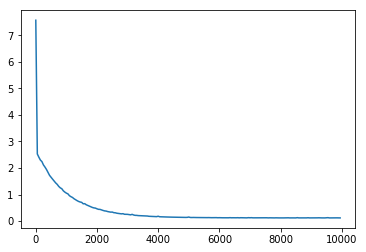

In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
def inference(w, b, x):        # inference, test, predict, same thing. Run model after training
    pred_y = w * x + b
    return pred_y

def eval_loss(w, b, x_list, gt_y_list):
    avg_loss = 0.5 * (w * x_list + b - gt_y_list) ** 2    # loss function
    avg_loss =np.sum(avg_loss)/x_list.shape[1]
    return avg_loss

def gradient(pred_y, gt_y, x):
    diff = pred_y - gt_y
    dw = diff * x
    db = diff
    return dw, db

def cal_step_gradient(batch_x_list, batch_gt_y_list, w, b, lr):
    batch_size = batch_x_list.shape[1]
    #print(bat)
    avg_dw=0
    avg_db=0
    pred_y = inference(w, b, batch_x_list)	# get label data
    dw, db = gradient(pred_y, batch_gt_y_list, batch_x_list)
    avg_dw =np.sum(dw)
    avg_db += np.sum(db)
    avg_dw /= batch_size
    avg_db /= batch_size
    w -= lr * avg_dw
    b -= lr * avg_db
    return w, b

def train(x_list, gt_y_list, batch_size, lr, max_iter):
    w = 0
    b = 0
    index=[]
    loss_index=[]
    num_samples = x_list.shape[1]
    for i in range(max_iter):
        batch_idxs = np.random.choice(x_list.shape[1], batch_size)
        batch_x =np.array([ [x_list[0][j] for j in batch_idxs]])
        batch_y = np.array([[gt_y_list[0][j] for j in batch_idxs]])
        w, b = cal_step_gradient(batch_x, batch_y, w, b, lr)
        loss=eval_loss(w, b, x_list, gt_y_list)
        if i%50==0:   
            index.append(i)
            loss_index.append(loss)
            print('w:{0}, b:{1}'.format(w, b))
            print('loss is {0}'.format(loss))
    index=np.array(index)
    loss_index=np.array(loss_index)
    plt.plot(index,loss_index)

def gen_sample_data():
    w = random.randint(0, 10) + random.random()		# for noise random.random[0, 1)
    b = random.randint(0, 5) + random.random()
    num_samples = 100
    x_list = np.zeros((1,num_samples))
    y_list = np.zeros((1,num_samples))
    for i in range(num_samples):
        x = random.randint(0, 100) * random.random()
        x_list[0][i]=x
        y = w * x + b + random.random() * random.randint(-1, 1)
        y_list[0][i]=y
    return x_list, y_list, w, b

def run():
    x_list, y_list, w, b = gen_sample_data()
    lr = 0.001
    max_iter = 10000
    train(x_list, y_list, 50, lr, max_iter)

if __name__ == '__main__':	# 跑.py的时候，跑main下面的；被导入当模块时，main下面不跑，其他当函数调
    run()